<a href="https://colab.research.google.com/github/rajcreo/jobathon-feb-2022/blob/main/Job_A_Thon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

ABC is an online content sharing platform that enables users to create, upload and share the content in the form of videos. It includes videos from different genres like entertainment, education, sports, technology and so on. The maximum duration of video is 10 minutes.

Users can like, comment and share the videos on the platform. 

Based on the user’s interaction with the videos, engagement score is assigned to the video with respect to each user. Engagement score defines how engaging the content of the video is. 

Understanding the engagement score of the video improves the user’s interaction with the platform. It defines the type of content that is appealing to the user and engages the larger audience.

**Objective** - The main objective of the problem is to develop the machine learning approach to predict the engagement score of the video on the user level.

# Table of Content



*   **Step 1: Importing Relevant Libraries**
*   **Step 2: Data Inspection**
*   **Step 3: Data Cleaning**
*   **Step 4: Exploratory Data Analysis (EDA)**
*   **Step 5: Data Preprocessing**
*   **Step 6: Model Building and Training**
*   **Step 7: Prediction on Test set and Submission**



# Step 1: Importing Relevant Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from xgboost import XGBClassifier

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from scipy import stats

#Step 2: Data Inspection

In [ ]:
# mounting the google drive for importing required dataset
from google.colab import drive
drive.mount('/content/drive',)

Mounted at /content/drive


In [ ]:
# train and test path setup
train_path = "/content/drive/MyDrive/Job-A-Thon_2022/Dataset/train.csv"
test_path = "/content/drive/MyDrive/Job-A-Thon_2022/Dataset/test.csv"

In [ ]:
# importing train and test set
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [ ]:
# number of records in train and test set
print(f"train: {train.shape}")
print(f"test: {test.shape}")

train: (39161, 19)
test: (13184, 18)


* **There are total 89197 records and 10 features in train set.**
* **There are total 11121 records and 9 features in test set**

---

In [ ]:
# train info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

* **Train set conatins no null values.**
* **There are 2 categorical (gender and profession) and 8 numerical feature in train set.** 
* **engagement_score is dependent features and the rest are independent features.**


----

campaign_var1: 1-16, 1-16 (train, test)

campaign_var2: 1-15, 1-15

products_purchased: 1-4(null), 1-4(null)

var_1,6: 0-3, 0-3

var_2,3,4,9,10,12: 0-1, 0-1  except(var_9: 0-2)

var_5,7,8,: 0-2, 0-2

var_11: 0-4, 0-3

In [ ]:
# test info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13184 non-null  int64  
 1   created_at            13184 non-null  object 
 2   campaign_var_1        13184 non-null  int64  
 3   campaign_var_2        13184 non-null  int64  
 4   products_purchased    5048 non-null   float64
 5   signup_date           6535 non-null   object 
 6   user_activity_var_1   13184 non-null  int64  
 7   user_activity_var_2   13184 non-null  int64  
 8   user_activity_var_3   13184 non-null  int64  
 9   user_activity_var_4   13184 non-null  int64  
 10  user_activity_var_5   13184 non-null  int64  
 11  user_activity_var_6   13184 non-null  int64  
 12  user_activity_var_7   13184 non-null  int64  
 13  user_activity_var_8   13184 non-null  int64  
 14  user_activity_var_9   13184 non-null  int64  
 15  user_activity_var_1

* **Test set conatins no null values.**
* **There are 2 categorical (gender and profession) and 7 numerical feature in test set.** 


---

#Step 3: Data Cleaning

In [ ]:
# missing value in train set
train.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [ ]:
# missing value in test set
test.isnull().sum()

id                         0
created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
dtype: int64

**As there is no missing values in train and test set, so we don't have to bother about that.**

----

**As the age, views and followers should not be negative, so checking wether theses features contains any neagtive values or not**

In [ ]:
# function to count the negative value in each numerical attributes of the dataset
def count_negative(df):
  columns = df.select_dtypes(include=[np.int, np.float]).columns
  for column in columns:
    print(f"{column}: {len(train[train[column]<0])}")

In [ ]:
# counting negative in train set
count_negative(train)

id: 0
campaign_var_1: 0
campaign_var_2: 0
products_purchased: 0
user_activity_var_1: 0
user_activity_var_2: 0
user_activity_var_3: 0
user_activity_var_4: 0
user_activity_var_5: 0
user_activity_var_6: 0
user_activity_var_7: 0
user_activity_var_8: 0
user_activity_var_9: 0
user_activity_var_10: 0
user_activity_var_11: 0
user_activity_var_12: 0
buy: 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and

In [ ]:
# counting negative of tets set
count_negative(test)

id: 0
campaign_var_1: 0
campaign_var_2: 0
products_purchased: 0
user_activity_var_1: 0
user_activity_var_2: 0
user_activity_var_3: 0
user_activity_var_4: 0
user_activity_var_5: 0
user_activity_var_6: 0
user_activity_var_7: 0
user_activity_var_8: 0
user_activity_var_9: 0
user_activity_var_10: 0
user_activity_var_11: 0
user_activity_var_12: 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and

**There is no negative value, so we don't have to bother about that**

----

In [ ]:
# dropping id, created_at, signup_date
train_df = train.drop(['id', 'created_at', 'signup_date'], axis=1)

In [ ]:
test_df = test.drop(['id', 'created_at', 'signup_date'], axis=1)

In [ ]:
train_df['products_purchased'] = train_df['products_purchased'].fillna(0)

In [ ]:
test_df['products_purchased'] = test_df['products_purchased'].fillna(0)

# Step 4: Exploratory Data Analysis (EDA)

In [ ]:
# features of train set
train_df.columns

Index(['campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12',
       'buy'],
      dtype='object')

In [ ]:
# top 5 records of train set
train_df.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0
2,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,6,0.0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
# no of unique values in each column of train set
train_df.nunique()

campaign_var_1          16
campaign_var_2          15
products_purchased       5
user_activity_var_1      4
user_activity_var_2      2
user_activity_var_3      2
user_activity_var_4      2
user_activity_var_5      3
user_activity_var_6      4
user_activity_var_7      3
user_activity_var_8      3
user_activity_var_9      2
user_activity_var_10     2
user_activity_var_11     5
user_activity_var_12     2
buy                      2
dtype: int64

* **As each value in row_id is unique so this column is not going to contribute any thing in prediction**

----



In [ ]:
# no of unique values in each column of test set
test_df.nunique()

campaign_var_1          16
campaign_var_2          15
products_purchased       5
user_activity_var_1      4
user_activity_var_2      2
user_activity_var_3      2
user_activity_var_4      2
user_activity_var_5      3
user_activity_var_6      4
user_activity_var_7      3
user_activity_var_8      3
user_activity_var_9      3
user_activity_var_10     2
user_activity_var_11     4
user_activity_var_12     2
dtype: int64

In [ ]:
# function to plot distribution of the data and QQplot
def dignostic_plots(df, column):
  # distribution plot
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  sns.distplot(df[column])

  # QQ plot
  plt.subplot(1,2,2)
  stats.probplot(df[column], dist="norm", plot=plt)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


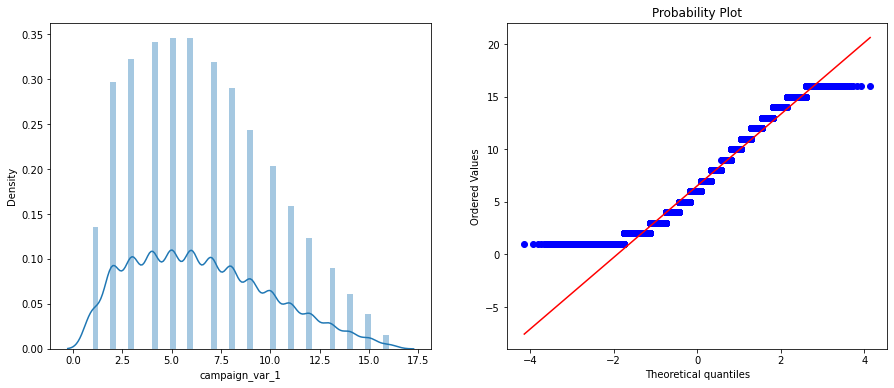

In [ ]:
# distribution and QQ plot of user_id
dignostic_plots(train_df, 'campaign_var_1')



**user_id is uniforly distributed and there is no outlier**

----



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


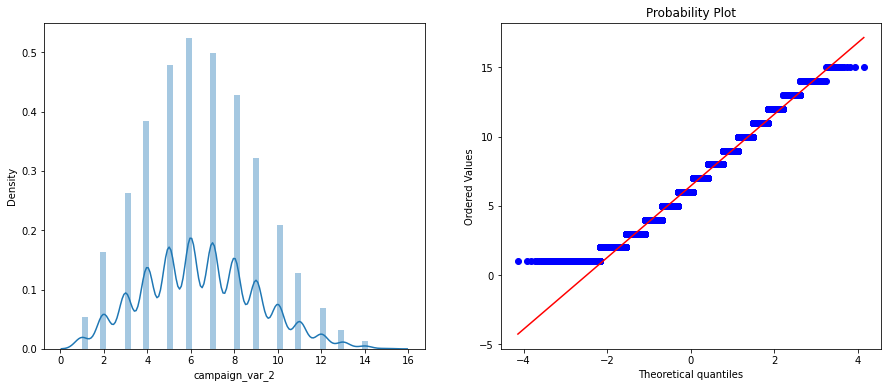

In [ ]:
# distribution and QQ plot of category_id
dignostic_plots(train_df, 'campaign_var_2')

**category_id is right skewed right distribution and there is no outlier**

---



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


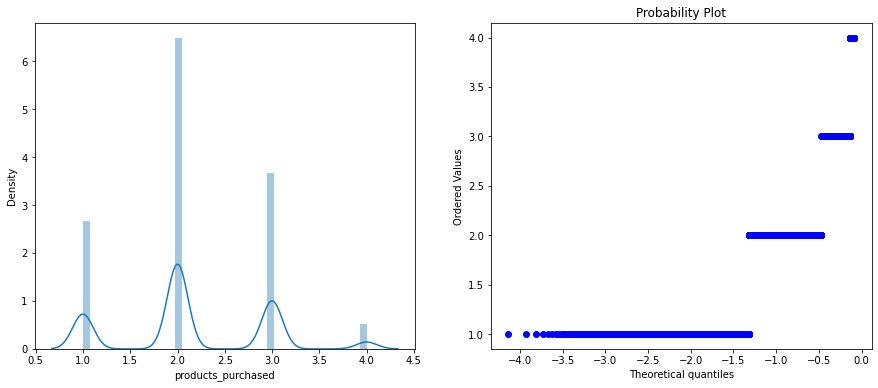

In [ ]:
# distribution and QQ plot of video_id
dignostic_plots(train, 'products_purchased')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


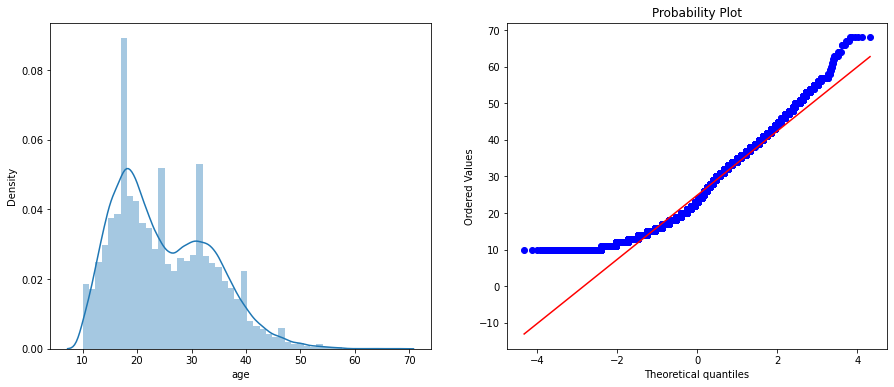

In [ ]:
# distribution and QQ plot of video_id
dignostic_plots(train, 'age')

In [ ]:
# function to count number of each label in a column
def count_labels(df, column):
  unique_arr = df[column].unique()
  for item in unique_arr:
    print(f"No. of {item}: {df[column].value_counts()[item]}")

In [ ]:
count_labels(train_df, "products_purchased")

No. of 2.0: 8867
No. of 3.0: 5024
No. of 0.0: 20911
No. of 1.0: 3643
No. of 4.0: 716


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


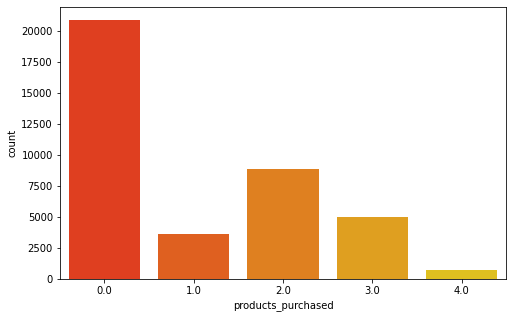

In [ ]:
# countplot to show the gender of the viewers
plt.figure(figsize=(8,5))
sns.countplot('products_purchased',data=train_df,palette='autumn')

**More viewers are male**


---

In [ ]:
count_labels(train, 'profession')

No. of Student: 44638
No. of Working Professional: 17719
No. of Other: 26840


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


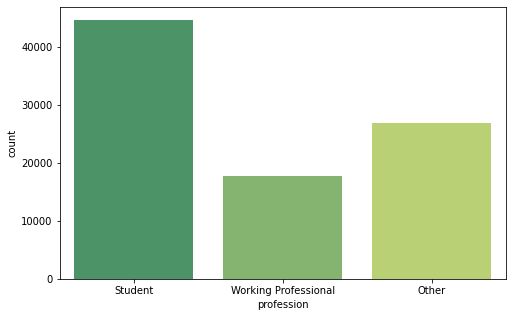

In [ ]:
# countplot to show the profession of the viewers
plt.figure(figsize=(8,5))
sns.countplot('profession',data=train,palette='summer')

**Most of the viewers are student and less viewers are working professional**

---

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


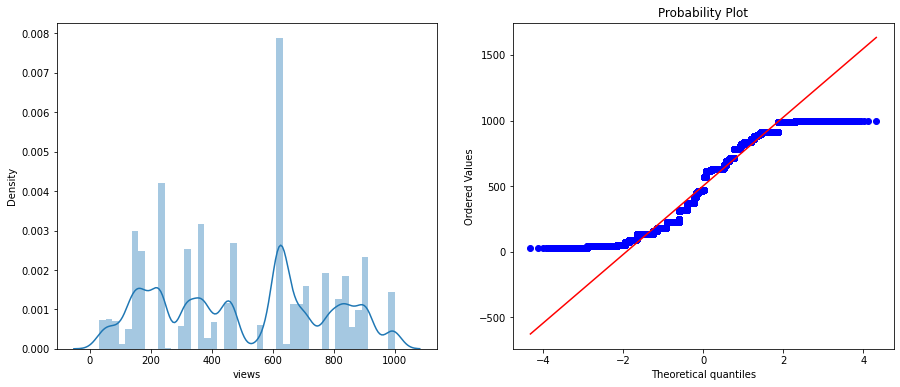

In [ ]:
# distribution and QQ plot of views
dignostic_plots(train, 'views')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


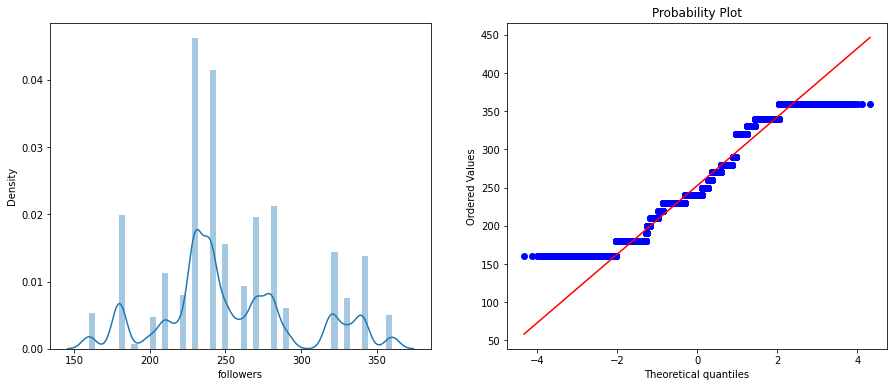

In [ ]:
# distribution and QQ plot of video_id
dignostic_plots(train, 'followers')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


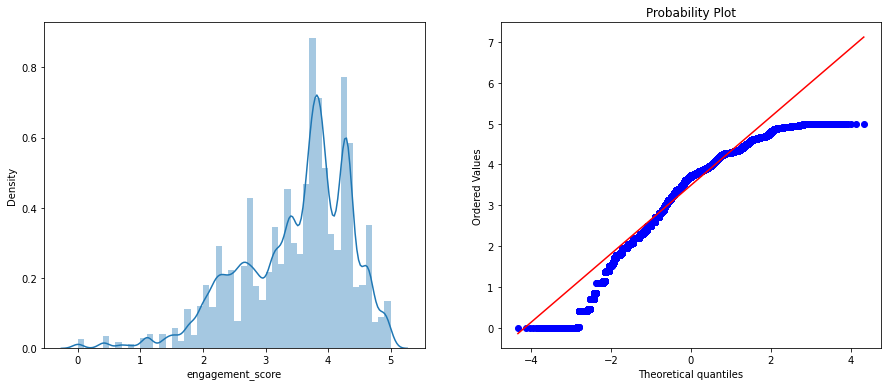

In [ ]:
# distribution and QQ plot of engagement_score
dignostic_plots(train, 'engagement_score')

**engagement_score (dependent features ) are right skewed **

In [ ]:
# function to print the skew value of each numerical column of the dataset provided
def print_skewness(df):
  columns = df.select_dtypes(include=[np.int, np.float]).columns
  for column in columns:
    print(f"{column}: {df[column].skew()}")

In [ ]:
print_skewness(train)

row_id: 0.0
user_id: -0.0035944033171487113
category_id: 0.4842759917951323
video_id: 0.07962899431321899
age: 0.579959791454285
followers: 0.41416410815286264
views: 0.043661712908474044
engagement_score: -0.8556303385415264


In [ ]:
print_skewness(test)

row_id: 0.0
user_id: 0.0036242602250763536
category_id: 0.7001439990952302
video_id: 0.05006102254039487
age: 0.5785019450525777
followers: 0.6213516487650282
views: 0.31467540735549887


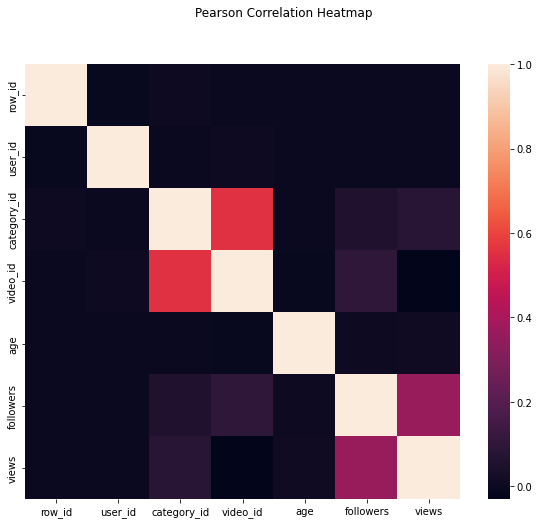

In [ ]:
# heat map of correlation between numeric features
pd.set_option('precision',2)
plt.figure(figsize=(10, 8))
sns.heatmap(train.drop(['engagement_score'],axis=1).corr(), square=True)
plt.suptitle("Pearson Correlation Heatmap")
plt.show();

**There is no features highly corelated to each other**

----

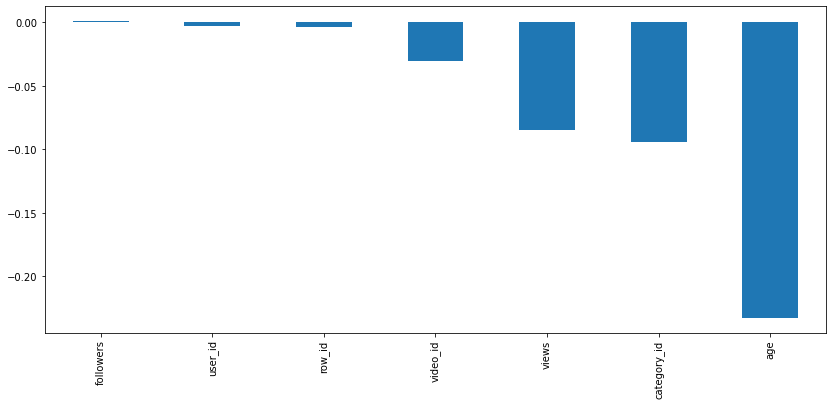

In [ ]:
# correalation of targret features with numeric features
corr_with_engagement_score = train.corr()['engagement_score'].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_with_engagement_score.drop("engagement_score").plot.bar()
plt.show();

**followers and user_id is negligibly correlated to target**

----

# Step 5: Data Preprocessing

In [ ]:
train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
# spliting the dependent and independent features
train_X = train_df.drop(['buy'], axis=1) 
train_y = train_df['buy']

In [ ]:
train_X.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,1,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0
1,2,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0
2,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0
3,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,6,0.0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
# # dropping row_id
# drop_attr = [0]
# drop_transfer = ("drop_columns", 'drop', drop_attr)

In [ ]:
# min-max scaling the numerical features 
num_attr = train_X.select_dtypes(include=[np.int, np.float]).columns[0:]
print(num_attr)
min_max_num_transfer = ('min_max_scaler', MinMaxScaler(), num_attr)

Index(['campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
# standard scaling scaling the numerical features 
# num_attr = train_X.select_dtypes(include=[np.int, np.float]).columns[1:]
# print(num_attr)
# std_num_transfer = ('std_scaler', StandardScaler(), num_attr)

Index(['user_id', 'category_id', 'video_id', 'age', 'followers', 'views'], dtype='object')


In [ ]:
# one hot encoding the categorical features
# cat_attr = train_X.select_dtypes(include=[np.object]).columns
# cat_transfer = ('one_hot_encoder', OneHotEncoder(), cat_attr)

In [ ]:
# std_scale_encoding_transformer = ColumnTransformer([std_num_transfer], remainder='passthrough')

In [ ]:
min_max_scale_encoding_transformer = ColumnTransformer([min_max_num_transfer], remainder='passthrough')

# Step 6: Model Building and Training

## XGBoost

In [ ]:
# XGboot Regression Model
xgb = XGBClassifier(n_estimators=2000, learning_rate=0.005)

In [ ]:
# Initilizing the pipeline
xgb_pipe = Pipeline(steps=[('data_preprocessing', min_max_scale_encoding_transformer), ('xgb', xgb)])

In [ ]:
# training the model
xgb_pipe.fit(train_X, train_y)

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('min_max_scaler',
                                                  MinMaxScaler(),
                                                  Index(['campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12'],
      dtype='object'))])),
                ('xgb', XGBClassifier(learning_rate=0.005, n_estimators=2000))])

## Decision Tree

# Step 7: Prediction on Test set and Submission

In [ ]:
submission_path = '/content/drive/MyDrive/Job-A-Thon_2022/sample_submission.csv'

In [ ]:
submission = pd.read_csv(submission_path)
final_predictions = xgb_pipe.predict(test)
submission['buy'] = final_predictions
#only positive predictions for the target variable
# submission['buy'] = submission['buy'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission_xgb_n2000_lr0005.csv', index=False)

In [ ]:
# solution
# learning rate/eta - 0.1
# max depth - 10
# n_estimators - 5000
# my_submission_xgb_full_n5000_lr1_max10.csv